In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataA_df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/dataA.csv')
dataA_df.head()

,x,y,z
0,81.997014,99.017636,a
1,41.724756,73.680872,a
2,26.566336,70.189922,a
3,124.561476,12.295715,a
4,142.729102,46.652237,a


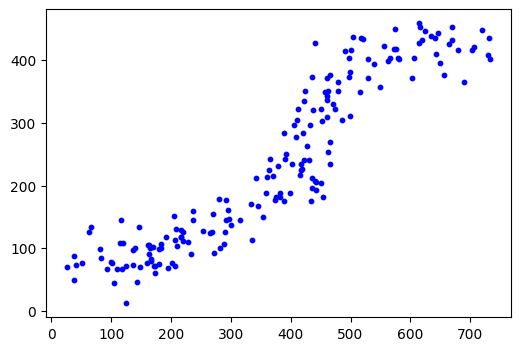

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter('x', 'y', s=10, color='blue', label='Data', data=dataA_df)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [6]:
# only for display purposes
pd.set_option('display.precision', 2)
np.set_printoptions(precision=2, suppress=True)

In [12]:
dataA_df.sort_values(by='x', inplace=True)
X, y = dataA_df[['x']],dataA_df['y'] # X is a dataframe, y is a series
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
def get_polynomial_prediction(Xtrain, Xtest, ytrain, ytest, degree=2):
    pf = PolynomialFeatures(degree=degree)
    Xtrain_p = pf.fit_transform(Xtrain)
    Xtest_p = pf.transform(Xtest)
    model = LinearRegression()
    model.fit(Xtrain_p, ytrain)
    ytrain_pred = model.predict(Xtrain_p) # prediction for train data
    ytest_pred = model.predict(Xtest_p) # prediction for test data
    mae_train = mean_absolute_error(ytrain, ytrain_pred) # mae for train data
    mae_test = mean_absolute_error(ytest, ytest_pred) # mae for test data
    dataA_df['pred'] = model.predict(pf.transform(dataA_df[['x']])) # prediction for all data
    plt.scatter('x','y', color = 'red', label = 'Data points', data=dataA_df)
    ax = plt.plot('x','pred', color = 'blue', label = 'Linear regression', data=dataA_df)
    return mae_train, mae_test, ax, model, pf


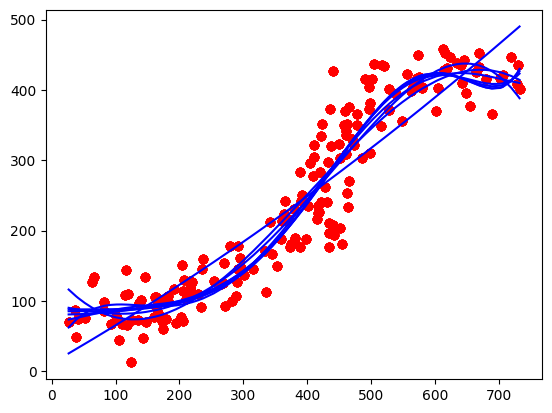

In [19]:
report = []
for i in range(2, 10):
    mae_train, mae_test, ax, model, pf = get_polynomial_prediction(Xtrain, Xtest, ytrain, ytest, degree=i)
    report.append({
        'degree': i,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'model': model,
        'pf': pf,
    })

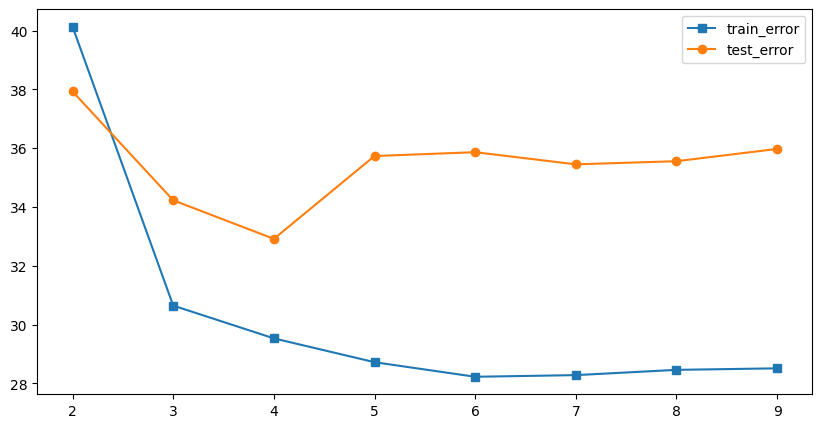

In [20]:
report_df = pd.DataFrame(report)
# overfit and underfit
plt.figure(figsize=(10, 5))
plt.plot('degree','mae_train', 's-', label='train_error',data=report_df, )
plt.plot('degree','mae_test', 'o-', label='test_error', data=report_df, )
plt.legend()
plt.show()


In [21]:
*_, model, pf = report_df.iloc[1].tolist()

In [22]:
model.predict(pf.transform([[32]]))

/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([111.43])